# Netflix movies recommender

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split

from recommender import matrix_factorization, find_best

np.random.seed(seed=1983)
pd.set_option("display.max_columns", 10)

## Test and train on a Dummy dataset

In [2]:
## Dummy dataset
a = pd.DataFrame([

     [1,5,3,0,1],

     [2,4,0,0,1],

     [3,1,1,0,5],

     [4,1,0,0,4],

     [5,0,1,5,4],
    
     [6,2,1,3,0],

    ]).set_index(0)

a.index.names = ['userId']
a.columns.names = ['movieId']

In [3]:
kf = KFold(n_splits=3)

In [4]:
mse_s=[]
for train, _ in kf.split(a,None):
    df = pd.DataFrame(train)
    print(f"TRAIN: {train}")
    mse_s.append(find_best(df,max_Ks=50, iterations=100))

TRAIN: [2 3 4 5]
K: 10	 | Learning_rate: 0.001	 | MSE:15.071774580026862
K: 10	 | Learning_rate: 0.01	 | MSE:2.1935173516309603
K: 10	 | Learning_rate: 0.1	 | MSE:1.048841605777777
K: 10	 | Learning_rate: 1	 | MSE:1.0004228488678764
K: 20	 | Learning_rate: 0.001	 | MSE:9.742491280681216
K: 20	 | Learning_rate: 0.01	 | MSE:3.3128476160047637
K: 20	 | Learning_rate: 0.1	 | MSE:1.1135070267130305
K: 20	 | Learning_rate: 1	 | MSE:1.0001488119597617
K: 30	 | Learning_rate: 0.001	 | MSE:50.043668589204515
K: 30	 | Learning_rate: 0.01	 | MSE:5.8665436574547485
K: 30	 | Learning_rate: 0.1	 | MSE:1.3855595878742568
K: 30	 | Learning_rate: 1	 | MSE:1.0001700971341196
K: 40	 | Learning_rate: 0.001	 | MSE:98.72441027437411
K: 40	 | Learning_rate: 0.01	 | MSE:12.077928617612175
K: 40	 | Learning_rate: 0.1	 | MSE:1.5188445211818773
K: 40	 | Learning_rate: 1	 | MSE:1.0000225465023582
K: 50	 | Learning_rate: 0.001	 | MSE:139.654434326975
K: 50	 | Learning_rate: 0.01	 | MSE:21.651910763520878
K: 50	 | 

In [9]:
best_folded = []
b = float(10e5)
for df in mse_s:
    mini = df.loc[df.MSE.idxmin()]
    if (mini[2] < b):
        b = mini[2]
        best_folded.append(mini)
best_folded

[K                2.000000
 Learning_rate    1.000000
 MSE              0.991765
 Name: 7, dtype: float64]

In [6]:
mse = find_best(a,max_Ks=50,iterations=100)

K: 10	 | Learning_rate: 0.001	 | MSE:78.1214260111823
K: 10	 | Learning_rate: 0.01	 | MSE:86.28113862400143
K: 10	 | Learning_rate: 0.1	 | MSE:49.73856326566307
K: 10	 | Learning_rate: 1	 | MSE:13.962388591051903
K: 20	 | Learning_rate: 0.001	 | MSE:249.84306045495265
K: 20	 | Learning_rate: 0.01	 | MSE:117.8982038188301
K: 20	 | Learning_rate: 0.1	 | MSE:41.84450340611182
K: 20	 | Learning_rate: 1	 | MSE:8.703282239690118
K: 30	 | Learning_rate: 0.001	 | MSE:521.5249383280899
K: 30	 | Learning_rate: 0.01	 | MSE:149.50053809355327
K: 30	 | Learning_rate: 0.1	 | MSE:39.73635794264919
K: 30	 | Learning_rate: 1	 | MSE:8.443336123102648
K: 40	 | Learning_rate: 0.001	 | MSE:726.442452115472
K: 40	 | Learning_rate: 0.01	 | MSE:200.15325859692388
K: 40	 | Learning_rate: 0.1	 | MSE:34.70587605486276
K: 40	 | Learning_rate: 1	 | MSE:6.830143483537256
K: 50	 | Learning_rate: 0.001	 | MSE:1427.1901196048689
K: 50	 | Learning_rate: 0.01	 | MSE:247.9578191086278
K: 50	 | Learning_rate: 0.1	 | MSE:4

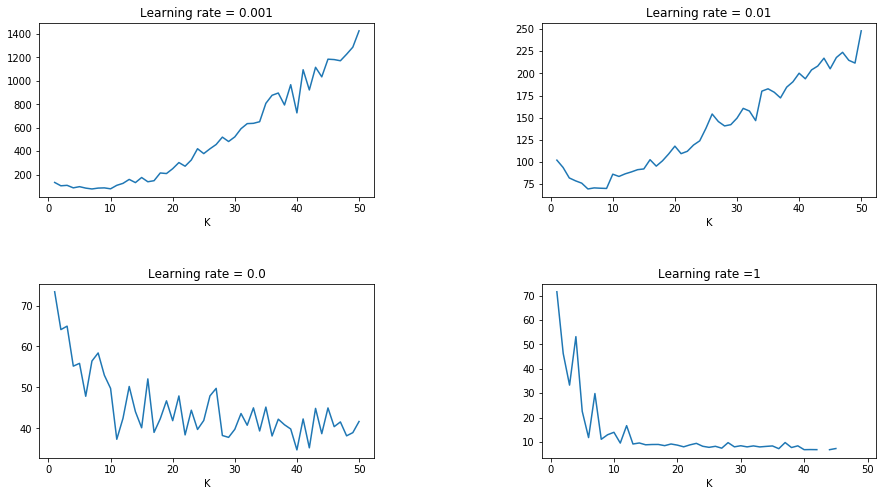

In [7]:
## Get minimum by Learning rate

## plot best k with bets learning rate
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

mse[mse['Learning_rate']==0.001].plot(x="K", y="MSE", ax=axes[0,0], legend=False)
axes[0, 0].set_title('Learning rate = 0.001')
mse[mse['Learning_rate']==0.01].plot(x="K", y="MSE", ax=axes[0,1], legend=False)
axes[0, 1].set_title('Learning rate = 0.01')
mse[mse['Learning_rate']==0.1].plot(x="K", y="MSE", ax=axes[1,0], legend=False)
axes[1, 0].set_title('Learning rate = 0.0')
mse[mse['Learning_rate']==1].plot(x="K", y="MSE", ax=axes[1,1], legend=False,)
axes[1, 1].set_title('Learning rate =1')
plt.show()

In [10]:
best_full = mse.loc[mse.MSE.idxmin()]
best_full

K                47.000000
Learning_rate     1.000000
MSE               6.743231
Name: 187, dtype: float64

In [16]:
best_full[1]

1.0

In [17]:
## Best matrix with best k
K = int(best_full[0])
recomm = matrix_factorization(a,K)
## Train the model, default iterations is 2
learning_rate = float(best_full[1])
recomm.fit(learning_rate,iterations=100)

In [18]:
## Increasing iterations improves over previous best MSE
min(recomm.mse)

6.000000011901456

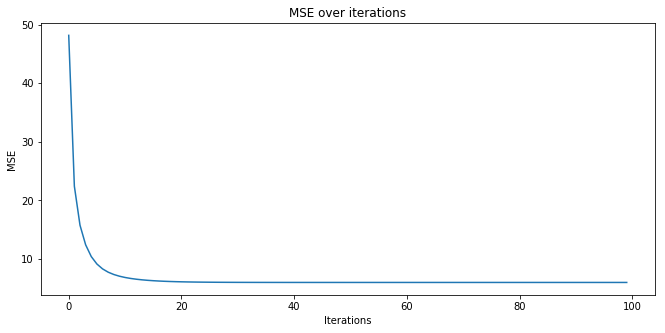

In [19]:
## Plot MSE over iterations
plt.figure(figsize=(11, 5))
plt.plot(recomm.mse)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE over iterations')
plt.show()

In [20]:
## Get the Predicted matrix
recomm.matrix

array([[5.50000601, 3.49992033, 0.50002864, 1.50000201],
       [4.49999922, 0.50001032, 0.49999629, 1.49999974],
       [1.50000084, 1.49998886, 0.50000401, 5.50000028],
       [1.50000011, 0.4999986 , 0.5000005 , 4.50000004],
       [0.49999567, 1.50005748, 5.49997933, 4.49999855],
       [2.49999816, 1.50002441, 3.49999122, 0.49999938]])

In [24]:
## Top 5 movies to recommend
recomm.top_recommends(1)

,movieId,rating,title
0,2,3.0,Ariel
1,3,1.0,Shadows in Paradise


## Netflix database EDA

In [25]:
ratings = pd.read_csv("data/ratings_small.csv")

In [26]:
##Columns not needed
ratings.drop('timestamp', axis=1, inplace=True)

In [27]:
## Order by movieId
ratings.sort_values('movieId', inplace=True)

In [28]:
## Remove float ratings by casting to int
ratings['rating'] = ratings['rating'].astype(int)

In [29]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 9713 to 80823
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   userId   100004 non-null  int64
 1   movieId  100004 non-null  int64
 2   rating   100004 non-null  int32
dtypes: int32(1), int64(2)
memory usage: 2.7 MB


In [30]:
ratings.head()

,userId,movieId,rating
9713,68,1,4
35933,261,1,1
52631,383,1,5
35983,262,1,2
12038,77,1,4


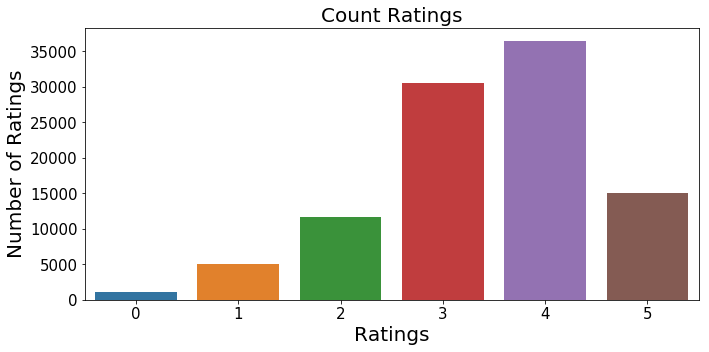

In [31]:
plt.figure(figsize = (11, 5))
sns.countplot(x="rating", data=ratings)
plt.tick_params(labelsize = 15)
plt.title("Count Ratings", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.show()

In [32]:
## Group by userid and count the numbers of movies rated by that user
ratings.groupby("userId")["rating"].count().sort_values(ascending = False).head()

userId
547    2391
564    1868
624    1735
15     1700
73     1610
Name: rating, dtype: int64

In [33]:
## Group by movies and count the number of users rated that movie
ratings.groupby("movieId")["rating"].count().sort_values(ascending = False).head()

movieId
356    341
296    324
318    311
593    304
260    291
Name: rating, dtype: int64

In [34]:
## set userId as index
ratings = ratings.set_index('userId').sort_index(axis = 0)

In [35]:
ratings

,movieId,rating
userId,,
1,2455,2
1,1287,2
1,2968,1
1,1339,3
1,1172,4
...,...,...
671,1266,4
671,1197,3
671,4022,3


In [36]:
## pivot df to get the matrix Yai
ratings = ratings.pivot(index=ratings.index, columns='movieId')['rating']

In [37]:
## replace NAN with movie mean
ratings = ratings.fillna(ratings.mean())
## replace NAN with zero
#ratings = ratings.fillna(0)

In [41]:
ratings.head(5)

movieId,1,2,3,4,5,...,161944,162376,162542,162672,163949
userId,,,,,,,,,,,
1,3.773279,3.317757,3.084746,2.307692,3.178571,...,5.0,4.0,5.0,3.0,5.0
2,3.773279,3.317757,3.084746,2.307692,3.178571,...,5.0,4.0,5.0,3.0,5.0
3,3.773279,3.317757,3.084746,2.307692,3.178571,...,5.0,4.0,5.0,3.0,5.0
4,3.773279,3.317757,3.084746,2.307692,3.178571,...,5.0,4.0,5.0,3.0,5.0
5,3.773279,3.317757,4.000000,2.307692,3.178571,...,5.0,4.0,5.0,3.0,5.0


In [42]:
## Split dataset in train and test
train, test = train_test_split(ratings, test_size = 0.2)

In [47]:
## fold train dataset
kf = KFold(n_splits=3)

In [48]:
## Find best with folded training data
mse_s=[]
for train, _ in kf.split(train, None):
    df = pd.DataFrame(train)
    print(f"TRAIN: {len(train)}")
    mse_s.append(find_best(df,max_Ks=10, iterations=5))

TRAIN: 238
K: 10	 | Learning_rate: 0.001	 | MSE:14149081.912213251
K: 10	 | Learning_rate: 0.01	 | MSE:4334431.53305951
K: 10	 | Learning_rate: 0.1	 | MSE:198986.87079488923
K: 10	 | Learning_rate: 1	 | MSE:nan
TRAIN: 238
K: 10	 | Learning_rate: 0.001	 | MSE:10767051.05809218
K: 10	 | Learning_rate: 0.01	 | MSE:4068990.890472385
K: 10	 | Learning_rate: 0.1	 | MSE:nan
K: 10	 | Learning_rate: 1	 | MSE:nan
TRAIN: 238
K: 10	 | Learning_rate: 0.001	 | MSE:4202632.508578081
K: 10	 | Learning_rate: 0.01	 | MSE:2209788.78185021
K: 10	 | Learning_rate: 0.1	 | MSE:224331.03819849557
K: 10	 | Learning_rate: 1	 | MSE:nan


In [49]:
best = []
b = float(10e5)
for df in mse_s:
    mini = df.loc[df.MSE.idxmin()]
    if (mini[2] < b):
        b = mini[2]
        best.append(mini)
        
best

[K                    7.000000
 Learning_rate        0.100000
 MSE              16220.596115
 Name: 26, dtype: float64]

In [ ]:
## Find best with full training data and folded best
mse = find_best(ratings,max_Ks=7,learning_rate=[0.1],iterations=20)

In [17]:
## Best matrix with best k
K = int(best_full[0])
recomm = matrix_factorization(a,K)
## Train the model, default iterations is 2
learning_rate = float(best_full[1])
recomm.fit(learning_rate,iterations=100)

In [ ]:
recomm.mse

In [ ]:
## Plot MSE over iterations
plt.figure(figsize=(11, 5))
plt.plot(recomm.mse)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE over iterations')
plt.show()

In [ ]:
## Get the Predicted matrix
recomm.matrix

In [ ]:
## Top 5 movies to recommend
recomm.top_recommends(1)